In [1]:
from matplotlib import colors
from matplotlib import cm
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [18]:
# Reading data
feats_labels = ["npoints","radius","width","std","aspect_ratio",
                "front_length","front_reg","circularity","kurtosis",
                "linearity","mean_angular_d","median_std",
                "mean_curvature","closest_dist","radius_nearest",
                "width_nearest","std_nearest","aspect_ratio_nearest",
                "front_length_nearest","front_reg_nearest",
                "circularity_nearest","kurtosis_nearest",
                "linearity_nearest","mean_angular_d_nearest",
                "median_std_nearest","mean_curvature_nearest","closest_dist_nearest","NN"]
train_df = pd.read_csv("laser_data/DataTrain.csv", header=None, names=feats_labels, usecols=range(len(feats_labels)))
test_df = pd.read_csv("laser_data/DataTest.csv", header=None, names=feats_labels, usecols=range(len(feats_labels)))
label_data = np.loadtxt("laser_data/LabelsTrain.csv")

In [4]:
len(feats_labels)

28

In [5]:
label_data

array([0., 1., 1., ..., 1., 1., 0.])

In [6]:
train_df.dtypes

npoints                   float64
radius                    float64
width                     float64
std                       float64
aspect_ratio              float64
front_length              float64
front_reg                 float64
circularity               float64
kurtosis                  float64
linearity                 float64
mean_angular_d            float64
median_std                float64
mean_curvature            float64
closest_dist              float64
radius_nearest            float64
width_nearest             float64
std_nearest               float64
aspect_ratio_nearest      float64
front_length_nearest      float64
front_reg_nearest         float64
circularity_nearest       float64
kurtosis_nearest          float64
linearity_nearest         float64
mean_angular_d_nearest    float64
median_std_nearest        float64
mean_curvature_nearest    float64
closest_dist_nearest      float64
NN                        float64
dtype: object

In [7]:
train_df.describe()

npoints        radius         width           std  aspect_ratio  \
count  1.443700e+04  1.443700e+04  1.443700e+04  1.443700e+04  1.443700e+04   
mean  -4.433064e-13 -3.562739e-13  2.071068e-12  2.701391e-13 -4.091785e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.449163e+00 -1.376594e+00 -9.658913e-01 -9.843432e-01 -4.846017e+00   
25%   -5.313781e-01 -6.775754e-01 -8.286499e-01 -6.113985e-01 -4.941081e-01   
50%   -2.094729e-01 -3.685639e-01 -3.101820e-01 -3.324939e-01 -2.434701e-01   
75%    6.377044e-01  1.526278e-01  1.015424e-01  2.520851e-01  2.207422e-01   
max    2.394933e+00  3.149710e+00  3.441085e+00  5.419520e+00  6.291443e+00   

       front_length     front_reg   circularity      kurtosis     linearity  \
count  1.443700e+04  1.443700e+04  1.443700e+04  1.443700e+04  1.443700e+04   
mean   9.697282e-14  5.264252e-13  5.416012e-14  3.200112e-12 -2.799008e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -9.875970e-01 -4.649412e-01 -1.399291e-01 -3.228678e-01 -9.629847e-01   
25%   -6.333402e-01 -4.647847e-01 -1.093716e-01 -3.217680e-01 -6.794670e-01   
50%   -3.460235e-01 -4.453533e-01 -8.550564e-02 -3.145273e-01 -3.544045e-01   
75%    1.761102e-01 -3.891430e-01 -3.418166e-02 -2.372743e-01  1.674367e-01   
max    4.384683e+00  5.636103e+00  8.101688e+01  1.903507e+01  4.389829e+00   

           ...       front_length_nearest  front_reg_nearest  \
count      ...               1.443700e+04       1.443700e+04   
mean       ...               3.948151e-13      -1.109337e-13   
std        ...               1.000000e+00       1.000000e+00   
min        ...              -1.202949e+00      -1.954696e-01   
25%        ...              -8.052413e-01      -1.950904e-01   
50%        ...              -1.612815e-01      -1.601537e-01   
75%        ...               4.381369e-01      -8.183277e-02   
max        ...               7.918008e+00       2.386275e+01   

       circularity_nearest  kurtosis_nearest  linearity_nearest  \
count         1.443700e+04      1.443700e+04       1.443700e+04   
mean          1.374015e-13      2.155418e-12      -2.742556e-14   
std           1.000000e+00      1.000000e+00       1.000000e+00   
min          -1.720569e-01     -1.445638e-01      -1.204771e+00   
25%          -1.509005e-01     -1.431203e-01      -8.357021e-01   
50%          -1.211213e-01     -1.300389e-01      -1.077367e-01   
75%          -7.994744e-02     -8.740168e-02       4.869465e-01   
max           5.539390e+01      6.261942e+01       9.252352e+00   

       mean_angular_d_nearest  median_std_nearest  mean_curvature_nearest  \
count            1.443700e+04        1.443700e+04            1.443700e+04   
mean             3.281318e-13        2.077588e-14            8.311829e-14   
std              1.000000e+00        1.000000e+00            1.000000e+00   
min             -1.063479e+00       -2.405284e+00           -2.177032e+00   
25%             -6.995388e-01       -5.155201e-01           -4.963494e-01   
50%             -3.621571e-01       -4.778472e-02           -1.337566e-01   
75%              4.055179e-01        5.478797e-01            3.226193e-01   
max              4.663607e+00        6.993757e+00            8.598491e+00   

       closest_dist_nearest            NN  
count          1.443700e+04  1.443700e+04  
mean           5.130087e-14  2.424316e-13  
std            1.000000e+00  1.000000e+00  
min           -1.505624e+00 -9.822280e-03  
25%           -8.158617e-01 -9.817092e-03  
50%           -1.291965e-01 -9.810843e-03  
75%            7.516892e-01 -9.788443e-03  
max            2.141769e+00  1.197742e+02  

[8 rows x 28 columns]

# Plotting distribution of parameters - pairplot

In [8]:
data_df = train_df.copy()
# Adding label column to dataframe
data_df['human'] = pd.Series(label_data, index=data_df.index)

In [9]:
data_df["human"].dtype

dtype('float64')

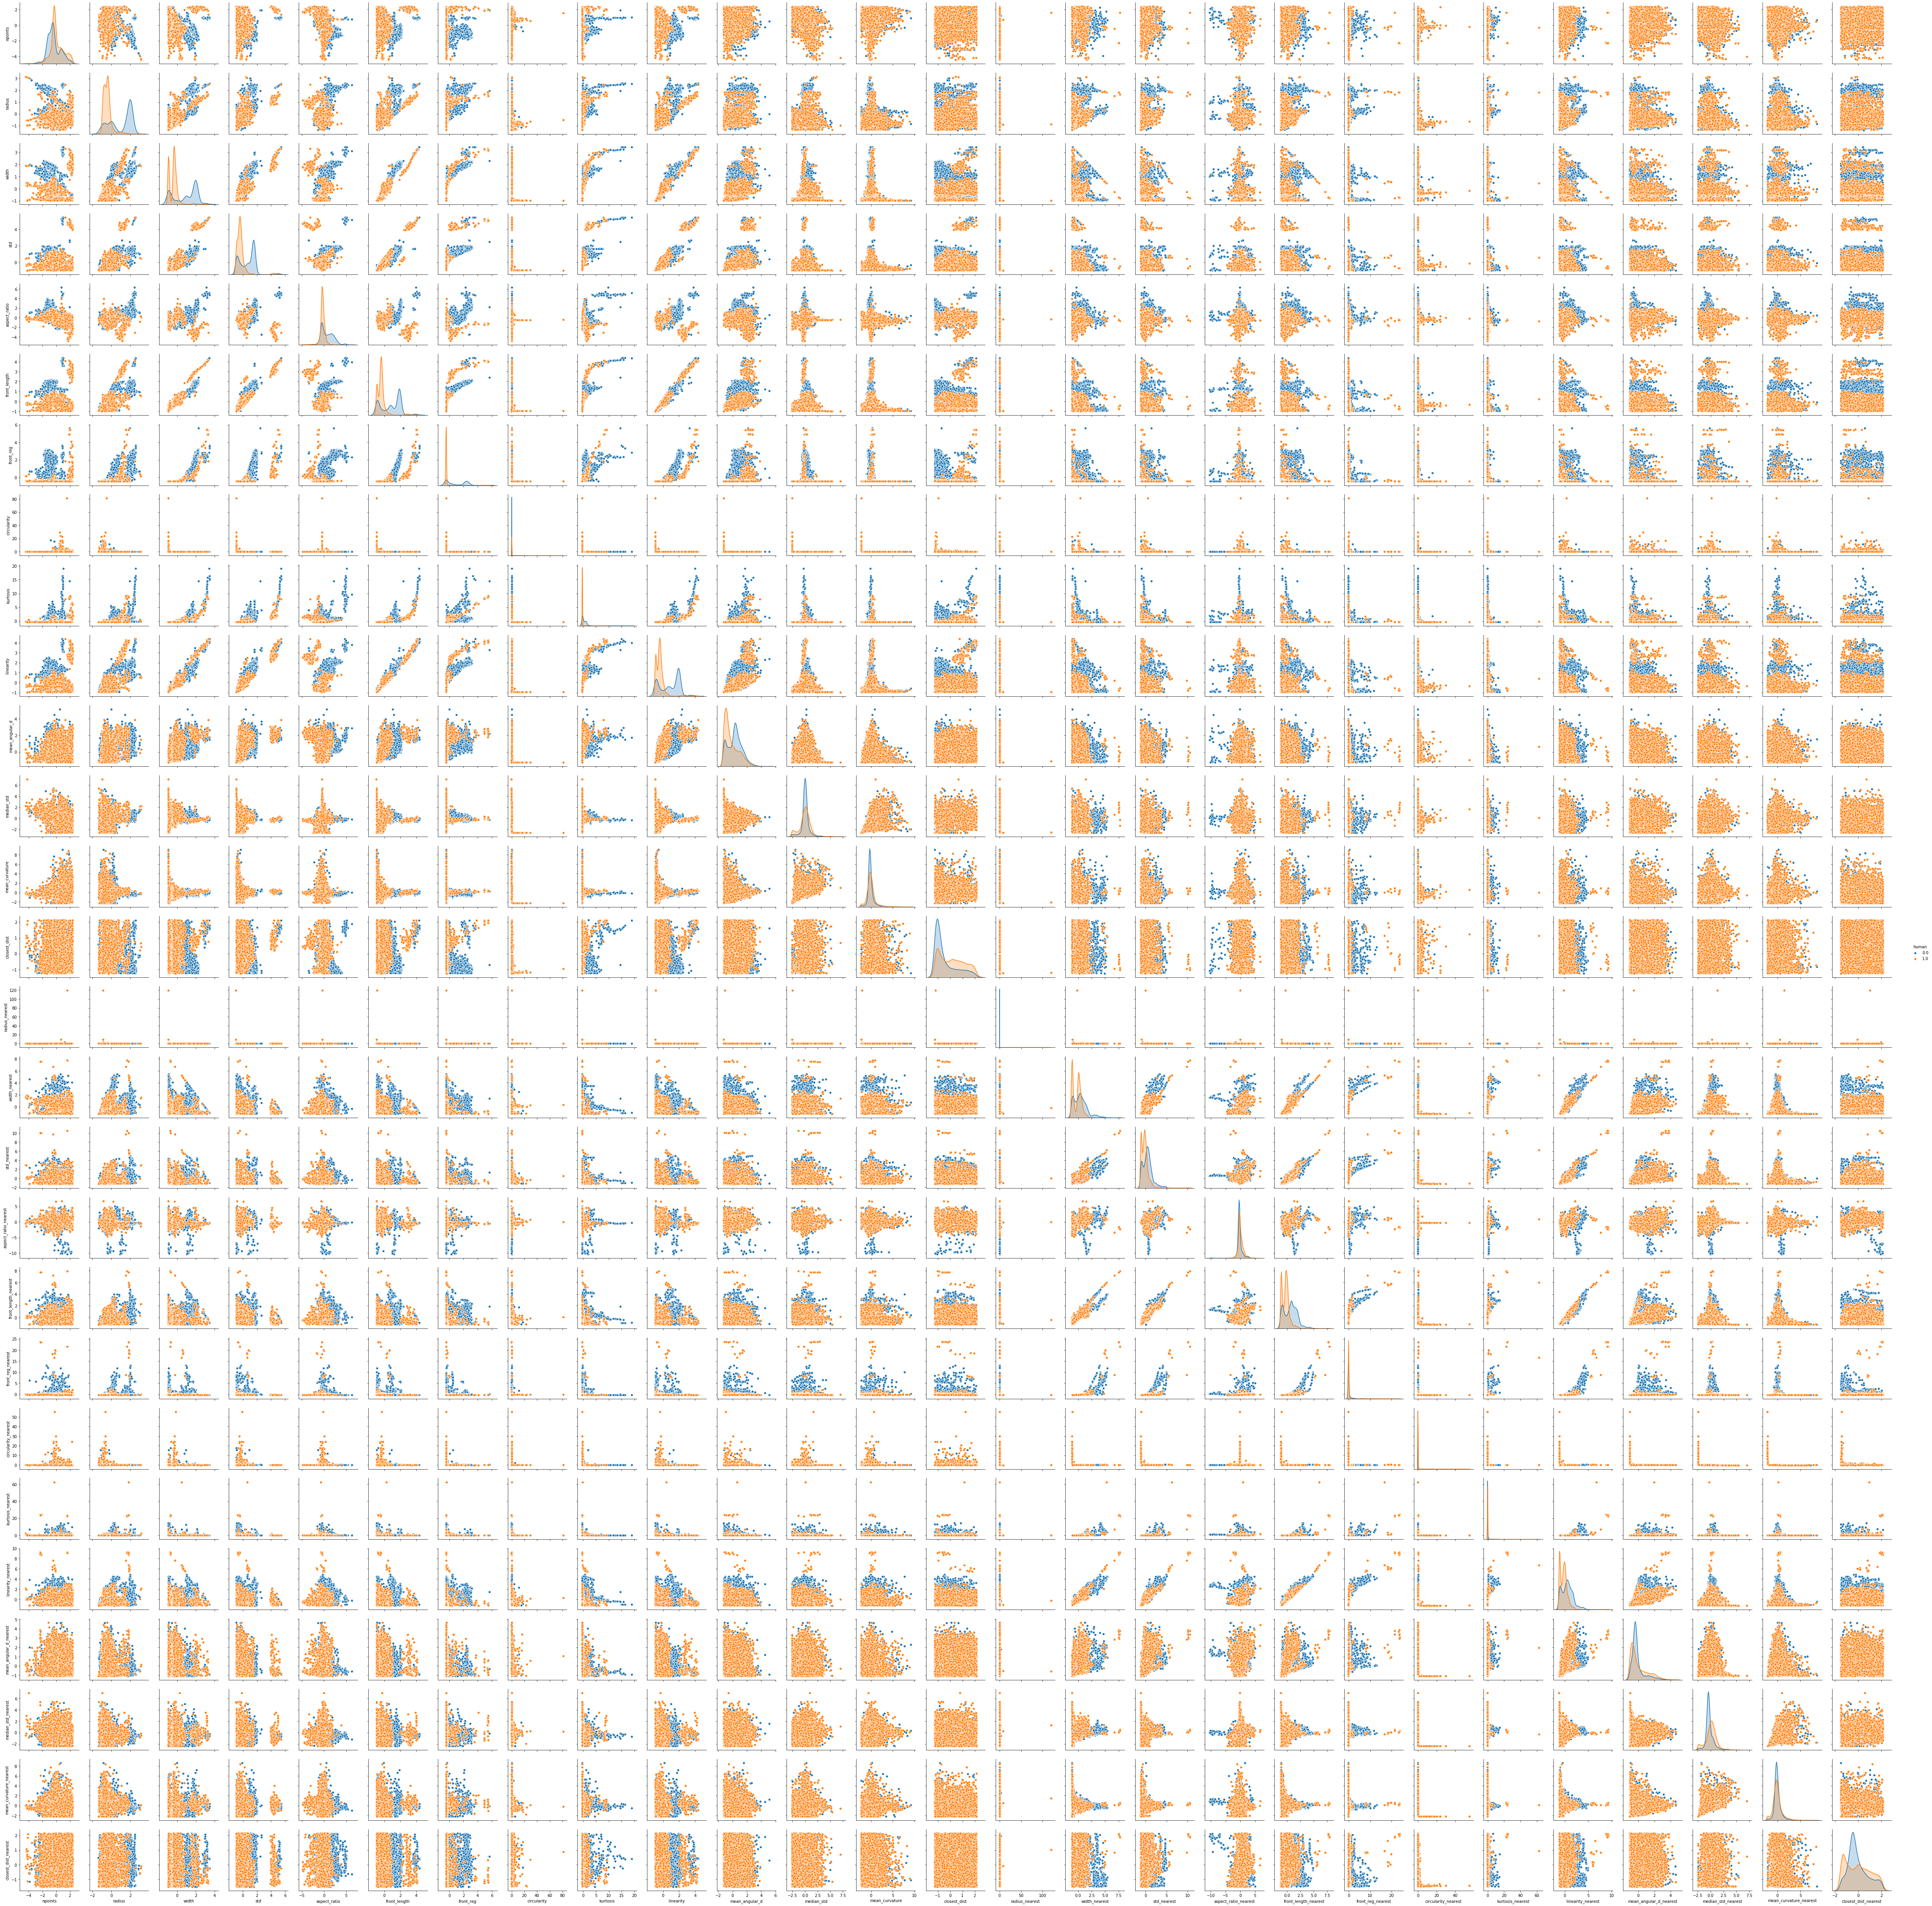

In [10]:
g = sns.pairplot(data_df, hue="human", vars=feats_labels[:-1])

The previous suggests that there doesn't seem to be some features more important than others... that is, we should use all the features... shocking!!

## Applying Random forest for classification

In [11]:
len(train_df)

14437

In [13]:
Xtr = train_df[:0.6*len(train_df)]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [8662.199999999999] of <class 'float'>

In [ ]:
# take the first 500 as training
train_ratio = 0.6
size = len(train_df)
Xtr = train_df[:train_ratio*len(train_df)]
Ytr = digits['target'][:train]
print("training size: " + str(len(Ytr)))

# testing set
Xte = digits['data'][train:]
Yte = digits['target'][train:]
print("testing size: " + str(len(Yte)))

In [ ]:
# Create a classifier: 
from sklearn.ensemble import RandomForestClassifier

# instantiate classifier object
classifier = RandomForestClassifier(n_estimators=50)

# fit the classification model on training set
classifier.fit(Xtr, Ytr)

# make predictions for testing set
pred_rf = classifier.predict(Xte) 

print("True Class / Predicted class")
print(np.vstack((Yte[0:10],pred_rf[0:10])))

In [17]:
from sklearn.externals import joblib
clf_load = joblib.load('models/saved_model.pkl')

In [19]:
pred_rf = clf_load.predict(test_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


In [20]:
from sklearn import metrics

rf_01 = metrics.zero_one_loss(y_test, pred_rf) # zero-one loss
rf_01_score = metrics.accuracy_score(y_test, pred_rf) # zero-one score
rf_confmat = metrics.confusion_matrix(y_test, pred_rf) # conf mat


print("Zero-One Loss: " + str(rf_01))
print("Zero-One Score: " + str(rf_01_score))
print("Confusion Matrix:")
print("[i, j] is the # of objects truly in group i but predicted to be in group j")
print(rf_confmat)

NameError: name 'y_test' is not defined

In [22]:
for i in pred_rf:
    print(i)

1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0


In [24]:
np.savetxt("predicted_labels/group_4", pred_rf, fmt='%1.1f')